# Tutorial 9

## Question 1
The folder `particle` contains a sequence of images of a bead undergoing [brownian motion](https://en.wikipedia.org/wiki/Brownian_motion). Your goal is to track the movement of the bead by identifying its position in each of the frames.

### Part 1

Follow the steps in the notes to determine the (x, y) co-ordinates of the bead in the image `particle/frame0.png`.
1. Use `np.imread` to convert the image file to a numpy array.
1. Convert the image to greyscale by summing along the final axis.
1. Threshold the array. Determine a value for the threshold which results in just a single 'blob'.
1. Determine the location using the function `sn.center_of_mass` (you do not need to determine the largest blob since there should be only one!)
1. Use `plt.imshow` and `plt.scatter` to mark the location of the bead on the image, like this:

<img src="q1.png" />

Location:  (99.0, 71.42857142857143)


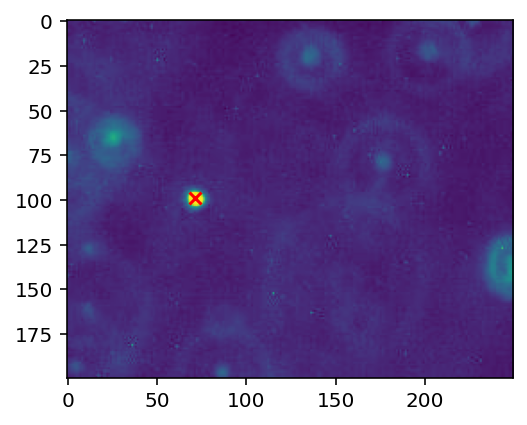

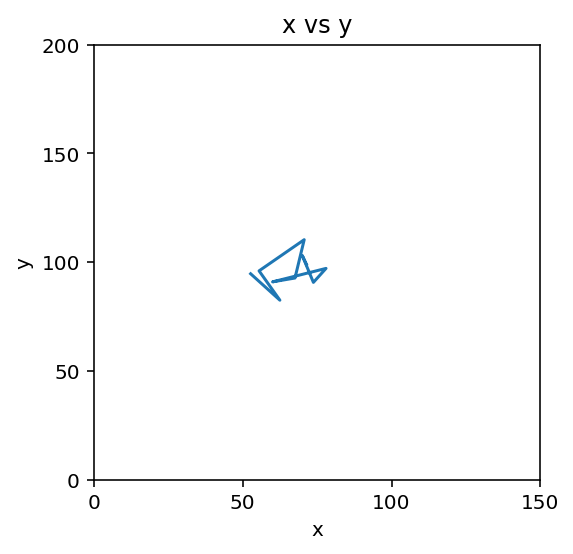

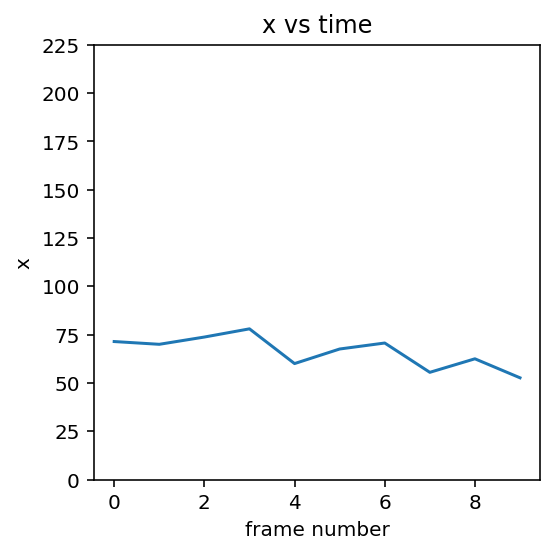

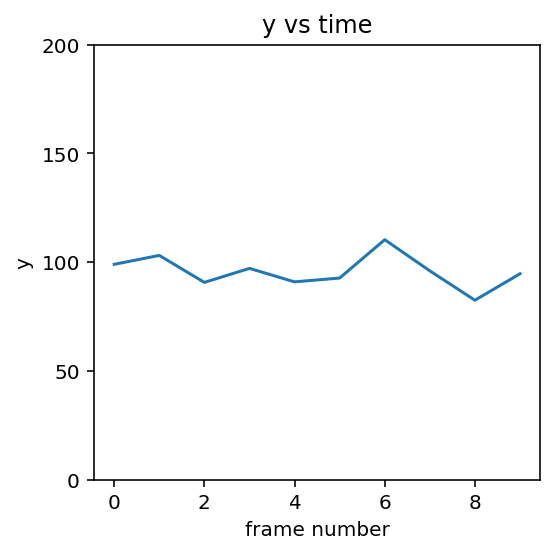

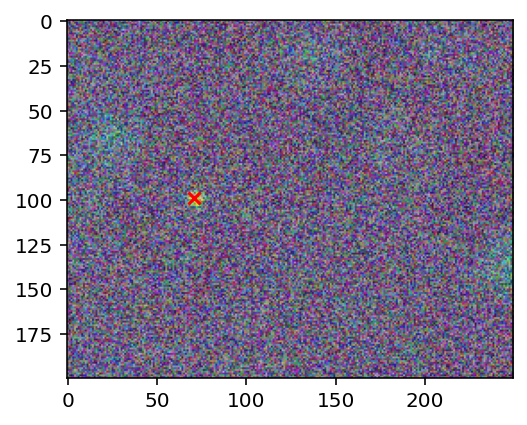

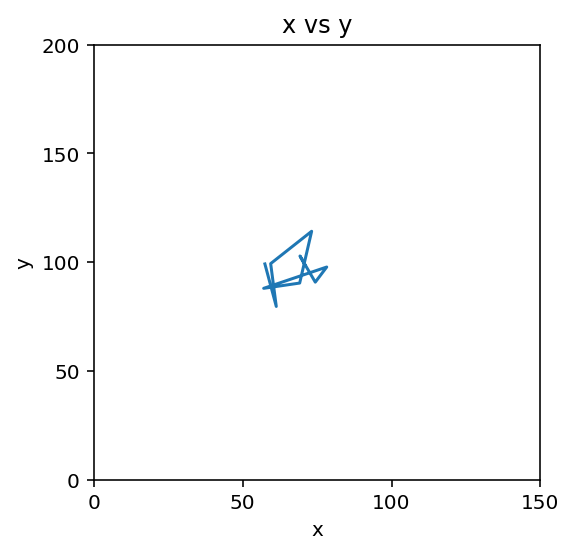

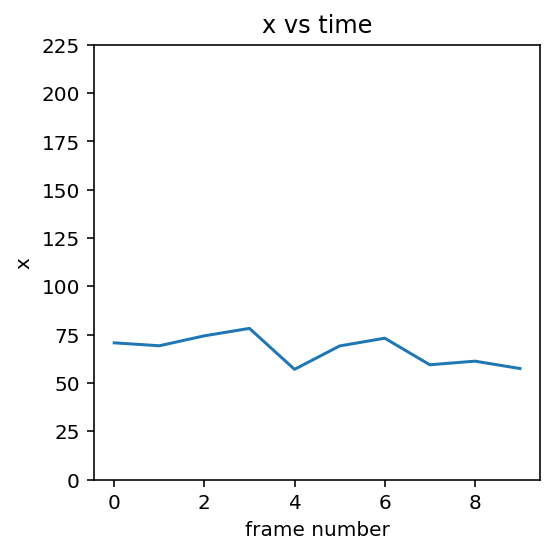

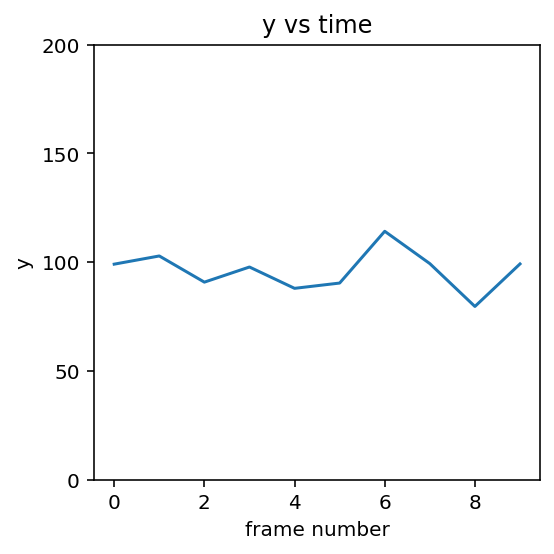

In [35]:
import numpy as np
import math as m
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy.ndimage as sn
import os

# Use np.imread to convert the image file to a numpy array.
# print(pic)
# Convert the image to greyscale by summing along the final axis.

class Image:
    def __init__(self, filename): #for multiple case, use (self, filename)
        self.pic = mpimg.imread(filename)
        greyscale_img = np.sum(self.pic, axis = 2)
        self.greyscale = np.round(greyscale_img, 1)
    
    def thresh_max(self):
        return np.max(self.greyscale)
    def thresh_min(self):
        return np.min(self.greyscale)
    
    def __str__(self):
        return filename

class Locate:
    def __init__(self, filename):
        self.img = Image(filename)
    
    def thres_num(self):
        return (self.img.thresh_max()+ self.img.thresh_min())/2
    
    def det_thresh_num(self, filename, adjust):
        return self.thres_num() + adjust
    
    def x_thres(self, filename, adjust):
        threshnum = self.det_thresh_num(filename, adjust)
        return self.img.greyscale > threshnum
    
    def num_blob(self, filename, adjust):
        x_lables, n = sn.label(self.x_thres(filename, adjust))
        return n
    
    def x_lables(self, filename, adjust):
        x_lab, n = sn.label(self.x_thres(filename, adjust))
        return x_lab
    
    def size_blobs(self, filename, adjust):
        xlabs = self.x_lables(self.x_thres(filename, adjust), adjust)
        n = self.num_blob(self.x_thres(filename, adjust), adjust)
        return sn.sum(self.x_thres(filename, adjust), xlabs, range(1,n+1))
    
    def get_large_blob(self, filename, adjust):
        return np.argmax(self.size_blobs(self.x_thres(filename, adjust), adjust))
    
    def get_particle_loc(self, filename, adjust):
        idx = self.get_large_blob(self.x_thres(filename, adjust), adjust)
        xlab = self.x_lables(self.x_thres(filename, adjust), adjust)
        location = sn.center_of_mass(self.x_thres(filename, adjust) , xlab , idx + 1)
        return location #determining the coordinates
    
# Threshold the array. Determine a value for the threshold which results in just a single 'blob'

# Use plt.imshow and plt.scatter to mark the location of the bead on the image, like this:


def plot(the_pic):
    plt.figure(figsize=(4,4))
    plt.imshow(the_pic)
    
def debug():
    img = Image("particle/frame0.png")
    loc = Locate("particle/frame0.png")
    
#     print("pic:",img.pic)
#     print("grey:", img.greyscale)
    print("Min: {}, Max: {}".format(img.thresh_min(), img.thresh_max()))
    threshnum = loc.thres_num() + 0.69 #plus nudge factor
    print("Thresh num: {}" .format(threshnum))
    x_thres = img.greyscale > threshnum
    print("threshold: ",x_thres)
    plot(img.pic)
    plot(x_thres)
    print("Number of blobs: ",loc.num_blob(x_thres))
    print(loc.x_lables(x_thres))
    print("sizes: {}".format(loc.size_blobs(x_thres)))
    print("Index", loc.get_large_blob(x_thres))
    location = loc.get_particle_loc(x_thres)
    print("Location: ", location)
    print("Suggested location: (98.92857142857143, 71.60714285714286)")

    
def length(folder):
        count = 0
        for file in os.listdir(folder):
            count += 1
        return count
    
def part1(file, adjust):
    img = Image(file)
    loc = Locate(file)
#     threshnum = loc.thres_num() + 0.69
#     threshnum = loc.det_thresh_num(file, 0.69)
#     x_thres = img.greyscale > threshnum
    location = loc.get_particle_loc(file, adjust)
    plot(img.pic)
    plt.scatter(location[1], location[0], marker = "x", color= "r")
    
def part2(file, adjust):
    img = Image(file)
    loc = Locate(file)
#     threshnum = det_thresh_num(file, 0.69)
#     x_thres = img.greyscale > threshnum
    location = loc.get_particle_loc(file, adjust)
    print("Location: ",location)

    
def plot_x_vs_y(coord, time):
        plt.figure(figsize=(4,4))
        plt.plot(coord[0,:],coord[1,:])
        plt.title("x vs y")
        plt.xticks(np.arange(0, 200, step=50))
        plt.yticks(np.arange(0,250, step = 50))
        plt.ylabel("y")
        plt.xlabel("x")
    
    
def plot_xvt(coord, time):
    plt.figure(figsize=(4,4))
    plt.plot(time,coord[0,:])
    plt.title("x vs time")
    plt.xticks(np.arange(0, 9, step=2))
    plt.yticks(np.arange(0,250, step = 25))
    plt.xlabel("frame number")
    plt.ylabel("x")

def plot_yvt(coord, time):
    plt.figure(figsize=(4,4))
    plt.plot(time,coord[1,:])
    plt.title("y vs time")
    plt.xticks(np.arange(0, 9, step=2))
    plt.yticks(np.arange(0,250, step = 50))
    plt.xlabel("frame number")
    plt.ylabel("y")    

def part3(folder, adjust):
    coor = np.zeros((2,10))
    #print(coor)
    cwd = os.getcwd()
    #print(length(folder))
    for i in range(length(folder)):
        filename = os.path.join(cwd+"/"+folder,"frame"+str(i)+".png")
        #print(filename)
        img = Image(filename)
        loc = Locate(filename)
#         threshnum = det_thresh_num(filename, 0.69)
#         x_thres = img.greyscale > threshnum
        location = loc.get_particle_loc(filename, adjust)
#         np.append(coor, )
        coor[0,i] = location[1]
        coor[1,i] = location[0]
#     print(coor[0,:])
#     print(coor[1,:])
    
#     print(time)
    time = np.linspace(0,length(folder)-1,length(folder))
    plot_x_vs_y(coor, time)
    plot_xvt(coor, time) 
    plot_yvt(coor, time)

        
if __name__ == "__main__":
    %matplotlib inline
    q1file = "particle/frame0.png"
    q1folder = "particle"
    q2file = "particle_noisy/frame0.png"
    q2folder = "particle_noisy"
    #debug()
    q1_adjust = 0.69
    q2_adjust = 0
    
    part1(q1file, q1_adjust)
    part2(q1file, q1_adjust)
    part3(q1folder, q1_adjust)
    part1(q2file, q2_adjust)
    part3(q2folder, q2_adjust)
    



### Part 2

Use your code from Question 1 to write a Python function `get_particle_location(filename)` which returns the (x, y) co-ordinates of the bead in the image file `filename`.

```
loc = get_particle_location("particle/frame0.png")
print(loc)
(98.92857142857143, 71.60714285714286)
```

### Part 3

By calling your function `get_particle_location` on each of the files, construct a 2 by 10 numpy array containing the co-ordinates of the bead in each of the 10 frames.

Make a plot of x vs time, y vs time and x vs y. Make sure you scale the axes so that they correspond to the dimensions of the image, as below.

<img src="b2.png" /><img src="b3.png" /><img src="b1.png" />

## Question 2

Repeat the above question for the noisy images in the folder `particle_noisy`.

For Part 1, you will have to choose a suitable threshold then pick the blob with the largest size, as in the notes.

For Part 3, can you find a value of the threshold that works for all of the images? If not, how could you solve this?
